Load and Inspect the Data:

First, we need to load the data and inspect its contents to understand its structure and characteristics.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Load the data
data = pd.read_csv('/content/insurance.csv')

In [57]:
# Display the first few rows of the dataset
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [58]:
# Display the data types of each column
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [59]:
# Display the basic statistics of the dataset
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [60]:
# Check for null values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


 Identify and Handle Outliers in the 'age' Column:

Outliers can be identified using the Interquartile Range (IQR) method.

In [61]:
# Calculate IQR for 'age'
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1


In [62]:
# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Lower Bound: -9.0, Upper Bound: 87.0


In [63]:
# Identify outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
print(f'Number of outliers: {outliers.shape[0]}')

Number of outliers: 0


In [64]:
# Replace outliers with the median value
median_age = data['age'].median()
data['age'] = np.where((data['age'] < lower_bound) | (data['age'] > upper_bound), median_age, data['age'])

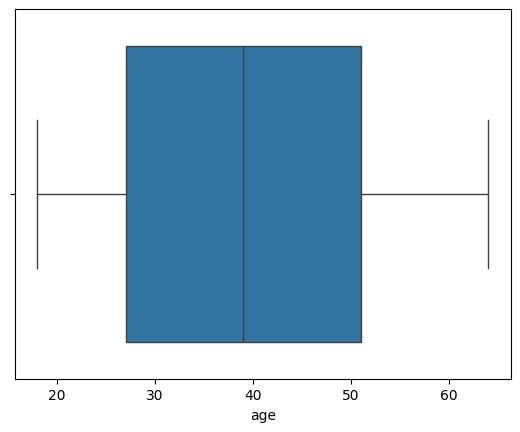

In [65]:
# Verify the changes
sns.boxplot(x=data['age'])
plt.show()

Encode Categorical Variables:

Label encode the categorical variables: 'sex', 'smoker', and 'region'.

In [66]:
# Initialize label encoder
label_encoder = LabelEncoder()

In [67]:
# Encode categorical columns
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

print(data.head())

    age  sex     bmi  children  smoker  region      charges
0  19.0    0  27.900         0       1       3  16884.92400
1  18.0    1  33.770         1       0       2   1725.55230
2  28.0    1  33.000         3       0       2   4449.46200
3  33.0    1  22.705         0       0       1  21984.47061
4  32.0    1  28.880         0       0       1   3866.85520


Prepare Data for Model Building:

Split the data into features and target variable, then scale the features.

In [68]:
# Define features and target
x = data.drop(columns=['charges'], axis = 1)
y = data['charges']

In [69]:
x

,age,sex,bmi,children,smoker,region
0,19.0,0,27.900,0,1,3
1,18.0,1,33.770,1,0,2
2,28.0,1,33.000,3,0,2
3,33.0,1,22.705,0,0,1
4,32.0,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1
1334,18.0,0,31.920,0,0,0
1335,18.0,0,36.850,0,0,2
1336,21.0,0,25.800,0,0,3


In [70]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [71]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

Build and Evaluate the Machine Learning Model:

We will use a Linear Regression model for this task.

In [72]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([ 1.10172305e+04,  9.78753017e+03,  3.79947821e+04,  1.61227784e+04,
        6.93075923e+03,  3.96902046e+03,  1.55178430e+03,  1.42832091e+04,
        8.95342886e+03,  7.43194558e+03,  4.54457668e+03,  1.02472753e+04,
        8.65710757e+03,  4.12619770e+03,  2.78113171e+04,  1.10395971e+04,
        1.12514458e+04,  6.03101003e+03,  8.17339252e+03,  2.70394424e+04,
        3.35778484e+04,  1.42670864e+04,  1.16850232e+04,  3.24069403e+04,
        4.41465153e+03,  9.14607182e+03,  1.12786921e+03,  1.00891473e+04,
        4.08782973e+03,  1.03569127e+04,  8.96224058e+03,  4.02452861e+04,
        1.54779185e+04,  1.36671353e+04,  2.47415217e+04,  5.13005676e+03,
        1.28428861e+04,  3.05264017e+04,  3.34289155e+04,  3.48813457e+03,
        4.00215674e+03,  4.27800724e+03,  3.04613664e+04,  3.93491672e+04,
        2.80033682e+04,  5.00299253e+03,  1.09312243e+04,  7.77848493e+03,
        3.60829639e+03,  1.05573586e+04,  5.62958594e+03,  3.37882569e+03,
        3.28476568e+04,  

In [74]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [75]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 31845929.134159423
R-squared: 0.799874714544996
